In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("user_data.csv")

# Display the first few rows
df.head()


,Age,Gender,Total Income,Utilities,Entertainment,School Fees,Shopping,Healthcare
0,50,Female,6200.0,0.0,0.0,0.0,0.0,0.0
1,54,Female,6800.0,0.0,0.0,0.0,0.0,0.0
2,37,Male,5600.0,0.0,0.0,0.0,0.0,0.0


In [2]:
df.dtypes


Age                int64
Gender            object
Total Income     float64
Utilities        float64
Entertainment    float64
School Fees      float64
Shopping         float64
Healthcare       float64
dtype: object

In [3]:
df['Total Income'] = pd.to_numeric(df['Total Income'], errors='coerce')


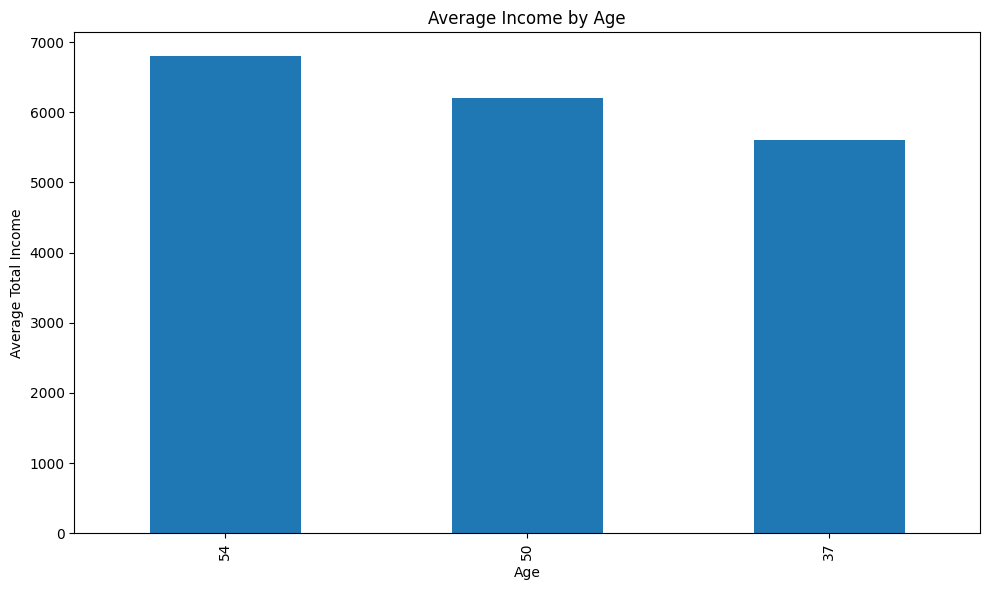

In [4]:
income_by_age = df.groupby('Age')['Total Income'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
income_by_age.plot(kind='bar')
plt.title("Average Income by Age")
plt.xlabel("Age")
plt.ylabel("Average Total Income")
plt.tight_layout()
plt.savefig("age_vs_income.png")  # Export chart
plt.show()


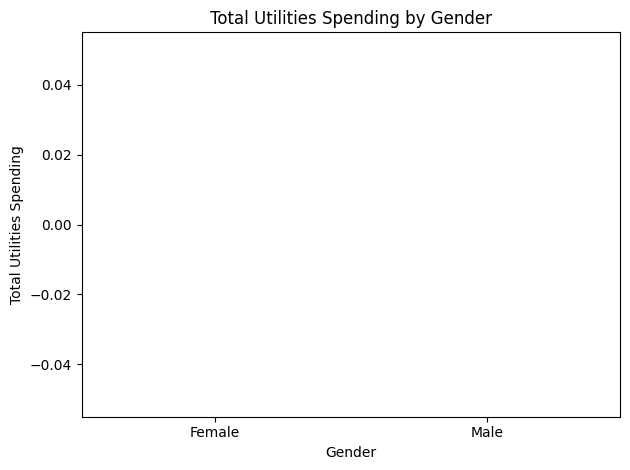

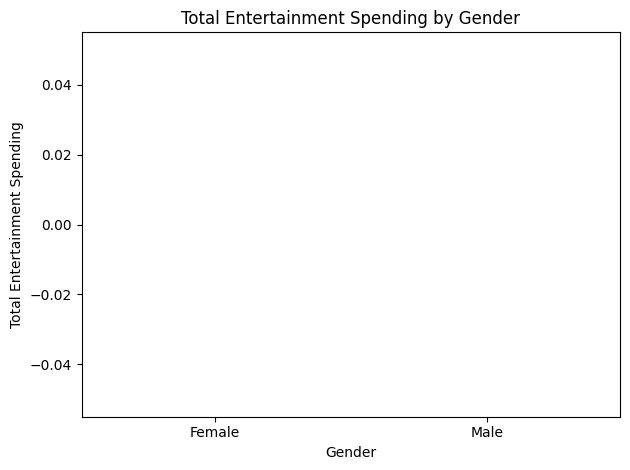

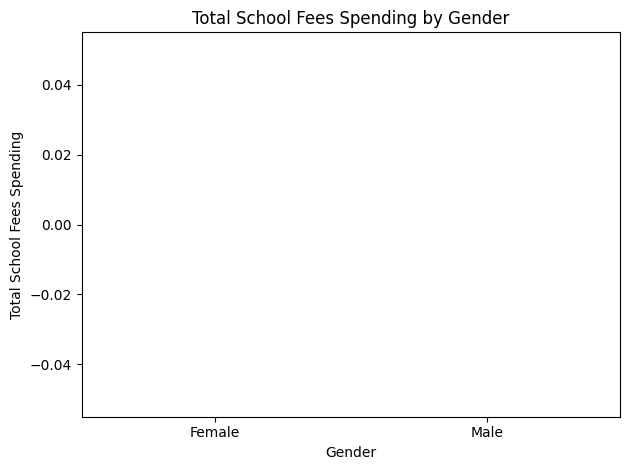

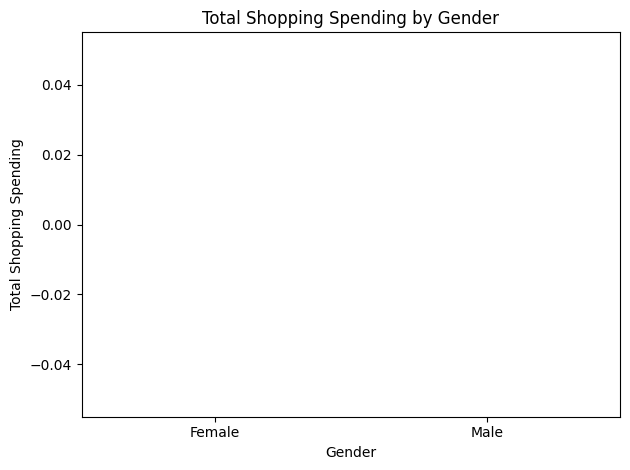

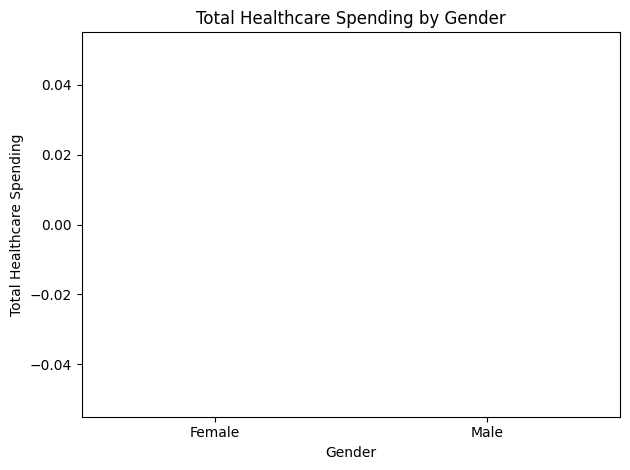

In [5]:
expenses_cols = ["Utilities", "Entertainment", "School Fees", "Shopping", "Healthcare"]

# Summarize each expense category by gender
gender_expenses = df.groupby('Gender')[expenses_cols].sum().reset_index()

# Example: a grouped bar chart for each expense category by gender
for col in expenses_cols:
    plt.figure()
    plt.bar(gender_expenses['Gender'], gender_expenses[col])
    plt.xlabel('Gender')
    plt.ylabel(f'Total {col} Spending')
    plt.title(f'Total {col} Spending by Gender')
    plt.tight_layout()
    plt.savefig(f"chart_{col.lower()}_gender.png")
    plt.show()
